#### Getting started with matplotlib


Install matplotlib on your computer with 

```bash
pip install matplotlib
```

Detailed instructions are at

[matplotlib.org/stable/users/installing.html](
https://matplotlib.org/stable/users/installing.html)



#### About matplotlib

* it is a Pyhton porting of Matlab functions; it covers essential *data visualisation*

* displays are organised in layers, each one is the result of a single act of drawing

* there are 2 different ways of coding it: functional and object-oriented. The latter allows for more customisation as key features of a plot are objects that can be manipulated

* when all layers are drawn, the final image is shown with `plt.show()`


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Initial plot: the functional style

In [ ]:
my_xs = [2, 3, 4, 5, 5.5, 6, 7]

my_ys = [1, 4, 9, 16, 25, 36, 37]

In [ ]:
upper_y = max(my_ys)

there is a blank canvas in the background

Each call to `plt.plot(...)` or `plt.axis(...)` etc. will draw something on the hidden canvas

finally, `plt.show()` will reveal the canvas by creating and displaying stand-alone image file

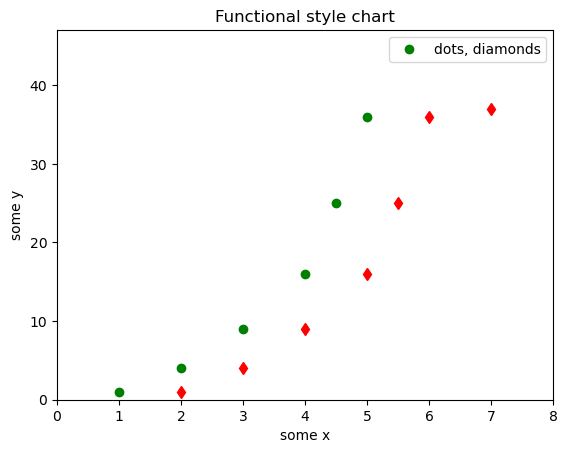

In [4]:
# X axis values, Y-axis values and color/shape of each point
plt.plot([1, 2, 3, 4, 4.5, 5], [1, 4, 9, 16, 25, 36], 'go') #green dots

plt.plot(my_xs, my_ys, 'rd') # red diamonds


# X axis dimensions then Y-axis dimensions, with a bit of space above
plt.axis([0, 8, 0, upper_y + 10])

#Title, labels,  legend
plt.title('Functional style chart')
plt.xlabel('some x')
plt.ylabel('some y')
plt.legend(['dots, diamonds'])
plt.show()

### The initial plot: Object-oriented Style

In OOP style, a *figure* is the whole image, as if it was the piece of paper on which you are drawing. 

"Axes" are the x and y boundaries of your drawing. 

This framework is very useful as it allows to have multiple plots on the same chart 

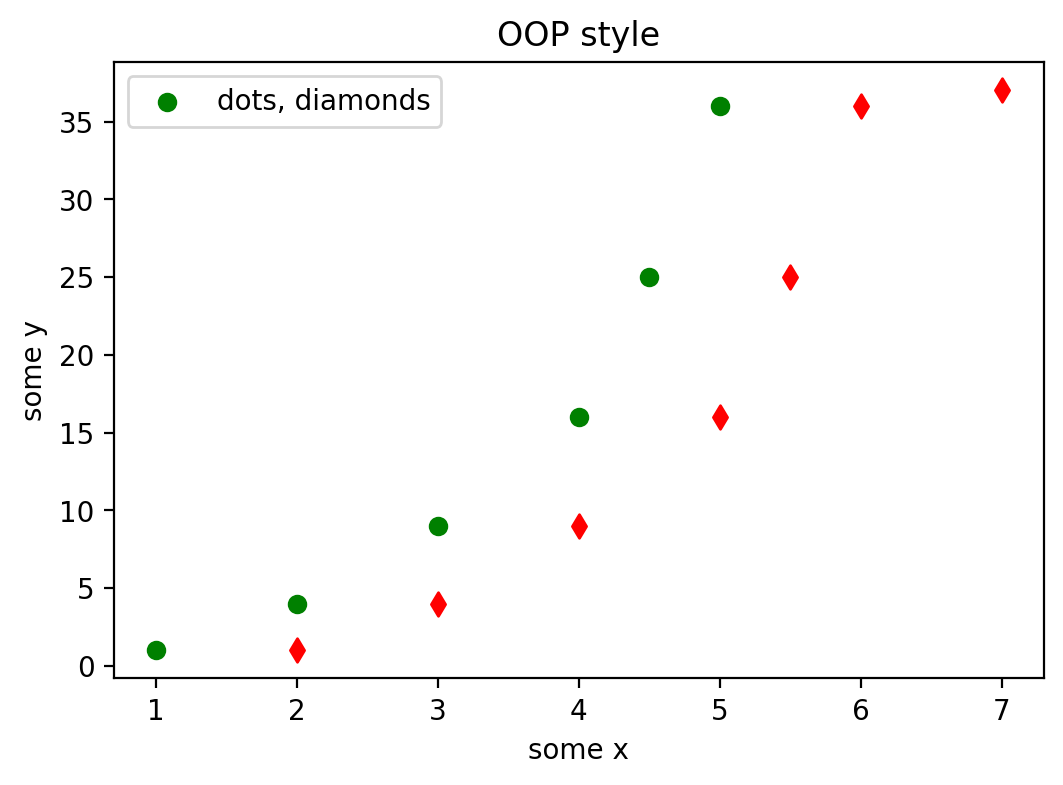

In [5]:
# Setting out "canvas"
# dpi indicates the level of resolution. Professinal publishing adopt a at least 300 dpis
fig, ax = plt.subplots(figsize = (6,4), dpi = 200) 

x_ar = [1, 2, 3, 4, 4.5, 5]

y_ar = [1, 4, 9, 16, 25, 36]

ax.scatter(x_ar, y_ar, c = 'g', marker = 'o')

ax.scatter(my_xs, my_ys, c = 'r', marker = 'd')


plt.title('OOP style')
plt.xlabel('some x')
plt.ylabel('some y')
plt.legend(['dots, diamonds'])


plt.show()

##### By default `plt` draws lines

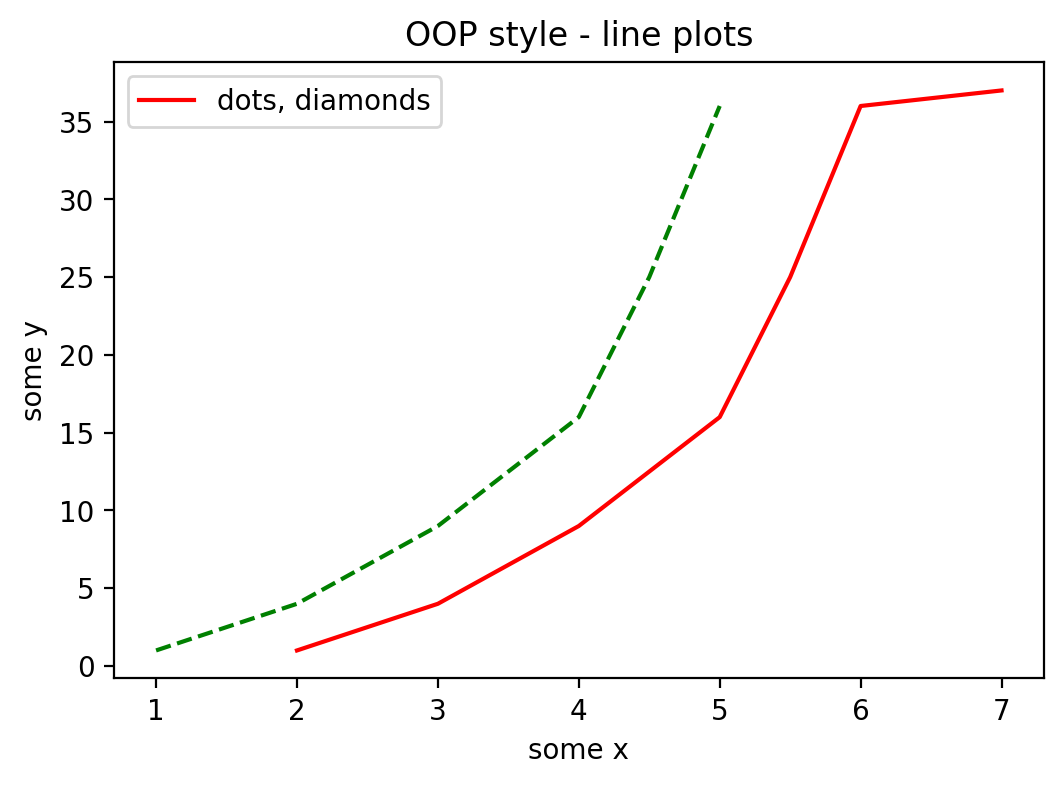

In [6]:
#Setting out "canvas"
#dpi indicates the level of resolution. Professinal publishing adopta at least 300 dpis
fig, ax = plt.subplots(figsize = (6,4), dpi = 200) 


x_ar = [1, 2, 3,  4,  4.5, 5]
y_ar = [1, 4, 9, 16, 25,  36]

# notice how function `plot` is called with 3 arguments and then with 4

# are ('r') line
ax.plot(my_xs, my_ys, c = 'r')

# a green ('g'), dashed ('--') line
ax.plot(x_ar, y_ar, '--', c = 'g') 

plt.title('OOP style - line plots')
plt.xlabel('some x')
plt.ylabel('some y')
plt.legend(['dots, diamonds'])

plt.show()

### Bar chart

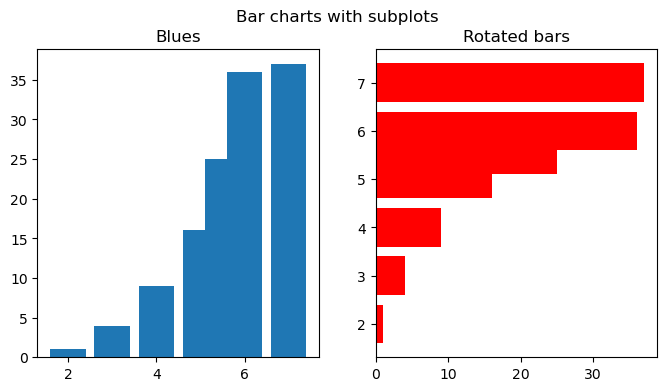

In [7]:
# notice that, thanks to object orientation, now we can have
# two displays in the same figure

fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))

ax1.bar(my_xs, my_ys)

ax2.barh(my_xs, my_ys, color = 'r')

fig.suptitle('Bar charts with subplots')

ax1.set_title('Blues')

ax2.set_title('Rotated bars')

plt.show()

### Violin plots

This type of chart is useful for visualising the shape of the data distributions, where the width of the lightblue area represents data frequency in a given region. 

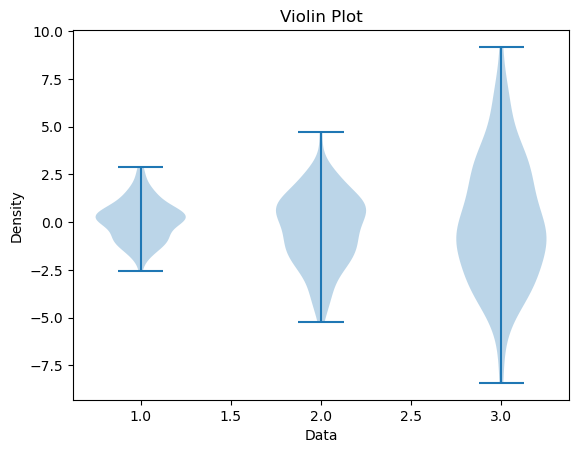

In [8]:
# let's generate some normally-distributed random data
# a list with three numpy arrays of length N will be created
# each array has floats drawn with mean MU and standard deviation=1, 2 and 3, resp.
N = 100
MU = 0

data = [np.random.normal(MU, std, N) for std in range(1, 4)] 

plt.violinplot(data)

plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Violin Plot')

plt.show()

### Box plots

#### This plot shows the minimum, first quartile (Q1), the median (Q2), the third quartile (Q3) and the maximum.

#### Notice the outliers representing the points at 1.5x the Inter Quartile Range (Q3-Q1)

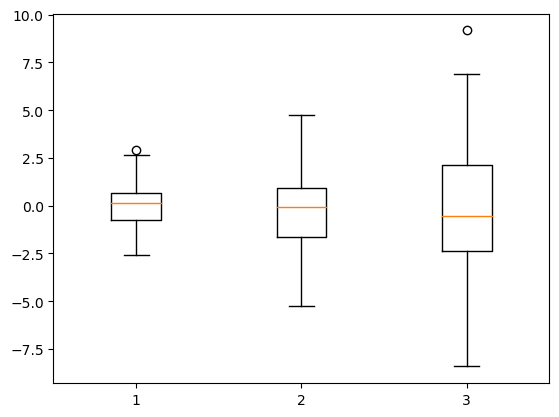

In [12]:
plt.boxplot(data)
plt.show()



#### Customisation

As you can see from the summary below, the possibilities for customisation are endless

Check out the blue circles and the respective definition below, each is a *object* that can be set up.

Credit: [matplotlib.org](https://matplotlib.org)

<img style="width: 80%" src="imgs/matplotlib_elements.png" />

### Visualising datasets

In this example we import data from the usual `biostats.csv` file to plot weight against age.

Scatterplots are the simplest form of data visualisation: it may not be appropriate here

Further details at [matplotlib.org/stable/plot_types/basic/scatter_plot.html](https://matplotlib.org/stable/plot_types/basic/scatter_plot.html)

In [ ]:
import csv
import matplotlib.pyplot as plt

MYFILE = './data/biostats.csv'

# change here to visualise different pairs
HORIZONTAL = 'Age'

VERTICAL = 'Weight(lbs)'

# good encoding for European languages
with open(MYFILE, newline='', encoding="utf-8-sig") as f:
    my_reader = csv.DictReader(f)

    x = []
    y = []

    # remember: dictReader it picking up strings only
    for row in my_reader:
        x.append(int(row[HORIZONTAL]))

        y.append(int(row[VERTICAL]))

# prepare the figure
plt.figure(figsize = (10, 10))

# the key command.
# 'o' stands for little circles
plt.plot(x, y, 'o')

# set up the data display
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Biostat Data')

plt.show()

### 3D Bars

This style emphasise the contribution of each determinant to the dependet variable.

The display style is fixed by `plt.style.use('_mpl-gallery')`

More details on [matplotlib.org](hhtps://matplotlib.org)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# Some independent variables
x = [1, 1, 2, 2]
y = [1, 2, 1, 2]
z = [0, 0, 0, 0]

# realised values
# this part will become clear later
dx = np.ones_like(x)*0.5
dy = np.ones_like(x)*0.5
dz = [2, 3, 1, 4]

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.bar3d(x, y, z, dx, dy, dz)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()